# Introduction to Sequential Parameter Optimization
## Multi-dimensional Functions

* This notebook illustrates how high-dimensional functions can be analyzed.

## 1 Example: `Spot` and the 3-dim Sphere Function

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import pylab
from numpy import append, ndarray, multiply, isinf, linspace, meshgrid, ravel
from numpy import array

### The Objective Function: 3-dim Sphere

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x) = \sum_i^n x_i^2 $$

* Here we will use $n=3$.

In [2]:
fun = analytical().fun_sphere


* The size of the `lower` bound vector determines the problem dimension.
* Here we will use `np.array([-1, -1, -1])`, i.e., a three-dim function.
* We will use three different `theta` values (one for each dimension), i.e., we set
  
  `surrogate_control={"n_theta": 3}`.

In [3]:
spot_3 = spot.Spot(fun=fun,
                   lower = -1.0*np.ones(3),
                   upper = np.ones(3),
                   var_name=["Pressure", "Temp", "Lambda"],
                   show_progress=True,
                   surrogate_control={"n_theta": 3})

spot_3.run()

spotPython tuning: 0.03443344056467332 [#######---] 73.33% 
spotPython tuning: 0.03134865993507926 [########--] 80.00% 
spotPython tuning: 0.0009629342967936851 [#########-] 86.67% 
spotPython tuning: 8.541951463966474e-05 [#########-] 93.33% 
spotPython tuning: 6.285135731399678e-05 [##########] 100.00% Done...



### Results

In [4]:
spot_3.print_results()

min y: 6.285135731399678e-05
Pressure: 0.005236109709736696
Temp: 0.0019572552655686714
Lambda: 0.005621713639718905


[['Pressure', 0.005236109709736696],
 ['Temp', 0.0019572552655686714],
 ['Lambda', 0.005621713639718905]]

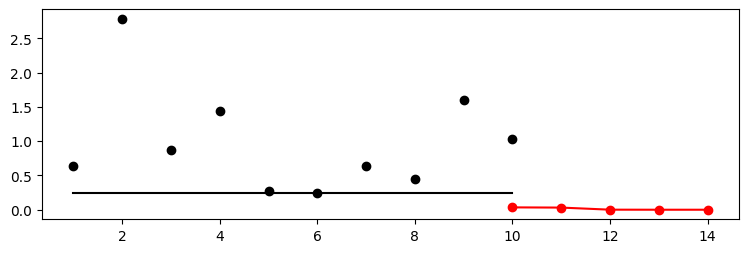

In [5]:
spot_3.plot_progress()

### A Contour Plot

* We can select two dimensions, say $i=0$ and $j=1$, and generate a contour plot as follows.
  * Note: We have specified identical `min_z` and `max_z` values to generate comparable plots!


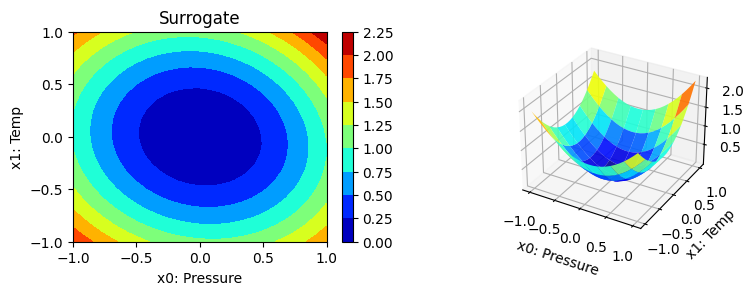

In [6]:
spot_3.plot_contour(i=0, j=1, min_z=0, max_z=2.25)

* In a similar manner, we can plot dimension $i=0$ and $j=2$:

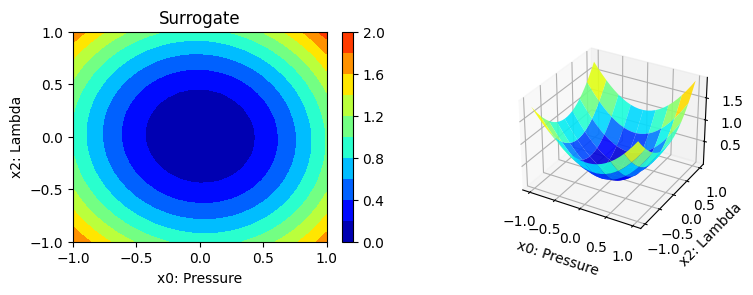

In [7]:
spot_3.plot_contour(i=0, j=2, min_z=0, max_z=2.25)

* The final combination is $i=1$ and $j=2$:

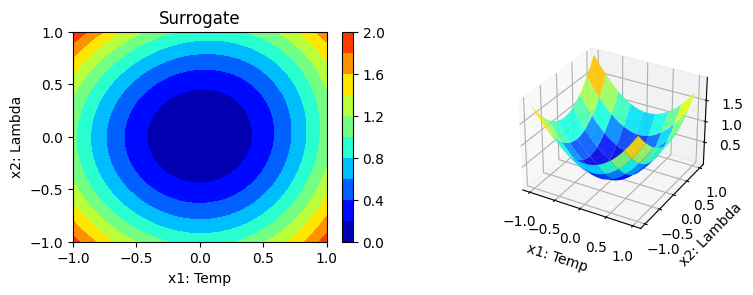

In [8]:
spot_3.plot_contour(i=1, j=2, min_z=0, max_z=2.25)

* The three plots look very similar, because the `fun_sphere` is symmetric.
* This can also be seen from the variable importance:

In [9]:
spot_3.print_importance()

Pressure:  99.35185545837122
Temp:  99.99999999999999
Lambda:  94.31627052007231


[['Pressure', 99.35185545837122],
 ['Temp', 99.99999999999999],
 ['Lambda', 94.31627052007231]]

## Conclusion:

* Based on this quick analysis, we can conclude that all three dimensions are equally important (as expected, because the analytical function is known).

# Exercises

* Important:
    * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
    * Please combine your results using this notebook.
    * Only one notebook from each group!
    * Presentation is based on this notebook. No addtional slides are required!
    * spotPython version `0.16.11` (or greater) is required (see http://www.gm.fh-koeln.de/~bartz/site/download/)

## Exercise 1

* Each team member should choose one of the following objective functions.
* Please add your name to the section title!

### 1. The Three Dimensional `fun_cubed`

* The input dimension is `3`. The search range is  $-1 \leq x \leq 1$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?

### 2. The Ten Dimensional `fun_wing_wt`

* The input dimension is `10`. The search range is  $0 \leq x \leq 1$ for all dimensions.
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?
  * Generate contour plots for the three most important variables. Do they confirm your selection?

### 3. The Three Dimensional `fun_runge`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?

### 4. The Three Dimensional `fun_linear`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?